# 课程简介

* 自学指南
* 数据分析大概怎么做，难点在哪
* Python简单回顾
* Pandas VS Python
* Pandas基础知识
* 实践1：用户行为数据分析
* 答疑和后续

# 自学指南

#### 初步应用

* conda安装：https://www.anaconda.com/products/individual
* Jupyter Notebook安装：https://jupyter.org/install.html
* Python教程：http://www.ttlsa.com/docs/jianming-python/python/  ，看以下几个部分就行了 1,2,3,4,5,6,7,9
* Pandas官方教程：https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

#### 进阶

* 《线性代数及其应用》或任何其他讲线性代数的书
* 《概率论与数理统计》或任何其他讲概率论的书
* 《统计推断》或任何其他讲统计的书

# 数据分析大概怎么做，难点在哪

#### 难点
1. 懂业务的人不懂程序，懂程序的人不懂业务，懂程序懂业务的人可能不懂统计
2. 数据分析，数据挖掘是一个交叉性非常强的方向，对人员综合素质要求较高
3. 实际的数据分析工作中，对数据的清洗，校验很麻烦且容易被忽略而得到一个不是明显错误的结论

#### 怎么做（个人经验）
1. 掌握相关编程技能
2. 了解基本的统计学指标和方法
3. 深入理解业务本身
4. 进行 提出假设 -》根据数据验证假设 -》得到结论和新的假设 -》提出假设 的循环

# Python简单回顾

In [90]:
#变量和运算

a = 3.14
b = 2
c = "python"
d = True
e = False

print(a+b)
print(c+" pandas")
print(d&e)
print(d|e)

5.140000000000001
python pandas
False
True


In [6]:
#控制流

for i in range(10):
    if i%2==0:
        print("+"+str(i))
    else:
        print("-"+str(i))

+0
-1
+2
-3
+4
-5
+6
-7
+8
-9


#### 基本数据结构

In [12]:
#list
a = [3,1,4,1,5,9,2]
a.append(6)

for i in a:
    print(i)
    
a.pop(0)
print(a)

3
1
4
1
5
9
2
6
[1, 4, 1, 5, 9, 2, 6]


In [13]:
#map
b = {"lan1":"c","lan2":"python","lan3":"c++"}
print(b)

b["lan4"] = "java"
print(b)

del b['lan1']
print(b)

print(b['lan4'])

for k,v in b.items():
    print(k+" : "+v)

{'lan1': 'c', 'lan2': 'python', 'lan3': 'c++'}
{'lan1': 'c', 'lan2': 'python', 'lan3': 'c++', 'lan4': 'java'}
{'lan2': 'python', 'lan3': 'c++', 'lan4': 'java'}
java
lan2 : python
lan3 : c++
lan4 : java


# Pandas VS Python

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = True

In [174]:
#某种商品在每一个时间点在两个市场统计到的价格 p1 , p2
p1 = np.random.random(100000)
p2 = np.random.random(100000)

print(p1)
print(p2)

[0.21742749 0.57158945 0.40610649 ... 0.69586845 0.80191076 0.18602396]
[0.99324972 0.9797505  0.28928897 ... 0.01421459 0.95573674 0.70207495]


#### 价格中位数

In [175]:
#python
def median(l):
    l = sorted(l)
    count = len(l)
    return l[int(count/2)-1]
print(median(p1))
print(median(p2))

#pandas
df = pd.DataFrame({"p1":p1,"p2":p2})
df.median()

0.5025137206291482
0.4974805081558715


p1    0.502518
p2    0.497481
dtype: float64

#### 每个数据点 p1和p2 的平均数

In [176]:
#python
means = []
for i in range(len(p1)):
    means.append((p1[i]+p2[i])/2)
print(means[:10])

#pandas
print(df.apply(lambda x:(x['p1']+x['p2'])/2,axis=1))

print((df['p1']+df['p2'])/2)

print(df.mean(axis=1))

[0.6053386057325811, 0.7756699789746244, 0.34769772738710414, 0.24774137506215083, 0.3261743068504959, 0.4607782357433639, 0.6741522665899463, 0.7856736051261528, 0.3283369381954428, 0.6129976553592602]
0        0.605339
1        0.775670
2        0.347698
3        0.247741
4        0.326174
           ...   
99995    0.473593
99996    0.466511
99997    0.355042
99998    0.878824
99999    0.444049
Length: 100000, dtype: float64
0        0.605339
1        0.775670
2        0.347698
3        0.247741
4        0.326174
           ...   
99995    0.473593
99996    0.466511
99997    0.355042
99998    0.878824
99999    0.444049
Length: 100000, dtype: float64
0        0.605339
1        0.775670
2        0.347698
3        0.247741
4        0.326174
           ...   
99995    0.473593
99996    0.466511
99997    0.355042
99998    0.878824
99999    0.444049
Length: 100000, dtype: float64


# Pandas基础知识

#### 创建DataFrame

In [217]:
p1 = np.random.random(1000)
p2 = np.random.random(1000)*0.8 + p1
df = pd.DataFrame({"p1":p1,"p2":p2})
dates = pd.date_range("20130101", periods=1000)
df.index = dates

print(type(df['p1']))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


#### 查看数据

In [218]:
df.head(3)

,p1,p2
2013-01-01,0.388888,0.430945
2013-01-02,0.314820,0.328444
2013-01-03,0.209659,0.696053


In [219]:
df.tail(4)

,p1,p2
2015-09-24,0.341313,0.624755
2015-09-25,0.227324,0.616131
2015-09-26,0.256188,0.530964
2015-09-27,0.509888,0.521664


In [220]:
df.describe()

,p1,p2
count,1000.000000,1000.000000
mean,0.514427,0.912449
std,0.284701,0.368928
min,0.000363,0.030845
25%,0.270497,0.646275
50%,0.519797,0.927722
75%,0.755661,1.178257
max,0.999239,1.780175


In [221]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-09-18,2015-09-19,2015-09-20,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27
p1,0.388888,0.314820,0.209659,0.409143,0.215762,0.796643,0.837276,0.939447,0.223407,0.119369,...,0.238174,0.387631,0.978259,0.410745,0.691575,0.270227,0.341313,0.227324,0.256188,0.509888
p2,0.430945,0.328444,0.696053,1.037244,0.976529,1.042608,1.030903,1.109756,0.562558,0.801115,...,0.389864,0.443008,1.339177,0.984771,0.951709,0.892185,0.624755,0.616131,0.530964,0.521664


#### 选择数据

In [222]:
#选择一列
df['p1'] # 或者 df.p1

2013-01-01    0.388888
2013-01-02    0.314820
2013-01-03    0.209659
2013-01-04    0.409143
2013-01-05    0.215762
                ...   
2015-09-23    0.270227
2015-09-24    0.341313
2015-09-25    0.227324
2015-09-26    0.256188
2015-09-27    0.509888
Freq: D, Name: p1, Length: 1000, dtype: float64

In [223]:
#按index的位置选择行
df[2:4]

,p1,p2
2013-01-03,0.209659,0.696053
2013-01-04,0.409143,1.037244


In [224]:
#按日期选择
df["20140101":"20141231"]

,p1,p2
2014-01-01,0.707685,0.922387
2014-01-02,0.922905,0.969654
2014-01-03,0.301629,0.548678
2014-01-04,0.762915,1.308432
2014-01-05,0.474732,1.117809
...,...,...
2014-12-27,0.732984,1.310573
2014-12-28,0.403634,0.704440
2014-12-29,0.692682,1.187807
2014-12-30,0.754678,0.818283


In [225]:
#按日期选择某一行
df.loc["20150101"] #注意df["20150101"]是不对的

p1    0.613965
p2    1.212058
Name: 2015-01-01 00:00:00, dtype: float64

In [226]:
#按位置选择某一行
df.iloc[100]

p1    0.176855
p2    0.400348
Name: 2013-04-11 00:00:00, dtype: float64

In [227]:
#条件选择
df[df['p1']>0.5]

,p1,p2
2013-01-06,0.796643,1.042608
2013-01-07,0.837276,1.030903
2013-01-08,0.939447,1.109756
2013-01-11,0.942130,1.731720
2013-01-12,0.833293,1.166677
...,...,...
2015-09-14,0.921645,1.026233
2015-09-17,0.967471,1.589671
2015-09-20,0.978259,1.339177
2015-09-22,0.691575,0.951709


In [243]:
#更多组合条件
c1 = df['p1']>0.5
c2 = df['p2']<0.6

df[c1&c2]

,p1,p2,date,dayofweek
2013-03-06,0.539620,0.570953,2013-03-06,2
2013-03-29,0.518086,0.580486,2013-03-29,4
2014-02-22,0.531342,0.595906,2014-02-22,5
2015-04-13,0.514490,0.564929,2015-04-13,0
2015-09-27,0.509888,0.521664,2015-09-27,6


#### 设置新列

In [229]:
df['date'] = df.index
df['dayofweek'] = df['date'].dt.dayofweek
df.head()

,p1,p2,date,dayofweek
2013-01-01,0.388888,0.430945,2013-01-01,1
2013-01-02,0.314820,0.328444,2013-01-02,2
2013-01-03,0.209659,0.696053,2013-01-03,3
2013-01-04,0.409143,1.037244,2013-01-04,4
2013-01-05,0.215762,0.976529,2013-01-05,5


#### apply

In [230]:
df[['p1','p2']].apply(lambda x:x.max()-x.min())

p1    0.998876
p2    1.749330
dtype: float64

#### Grouping

In [231]:
df.head()

,p1,p2,date,dayofweek
2013-01-01,0.388888,0.430945,2013-01-01,1
2013-01-02,0.314820,0.328444,2013-01-02,2
2013-01-03,0.209659,0.696053,2013-01-03,3
2013-01-04,0.409143,1.037244,2013-01-04,4
2013-01-05,0.215762,0.976529,2013-01-05,5


In [232]:
df.groupby("dayofweek").mean()

,p1,p2
dayofweek,,
0,0.544312,0.946921
1,0.521608,0.924797
2,0.505980,0.905582
3,0.522073,0.935083
4,0.523512,0.913306
5,0.506793,0.913501
6,0.476918,0.848196


#### 时间序列

In [233]:
df.resample("7D").mean()

,p1,p2,dayofweek
2013-01-01,0.453170,0.791818,3.0
2013-01-08,0.557010,0.949079,3.0
2013-01-15,0.458734,0.823684,3.0
2013-01-22,0.494255,0.892372,3.0
2013-01-29,0.622068,0.922625,3.0
...,...,...,...
2015-08-25,0.310626,0.545881,3.0
2015-09-01,0.577762,1.005156,3.0
2015-09-08,0.642288,0.949209,3.0
2015-09-15,0.502756,0.938731,3.0


#### 画图，更直观地感受数据

In [234]:
price = df[['p1','p2']]

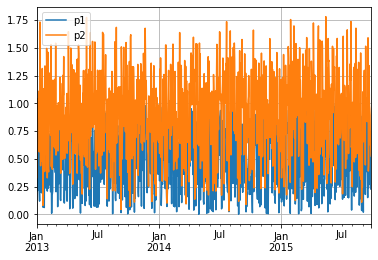

In [235]:
price.plot()

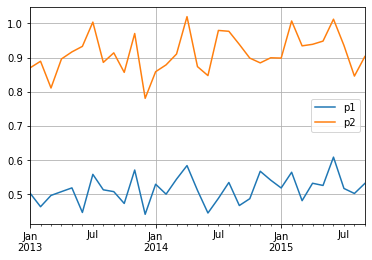

In [241]:
price.resample("M").mean().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15cf04c90>,
      dtype=object)

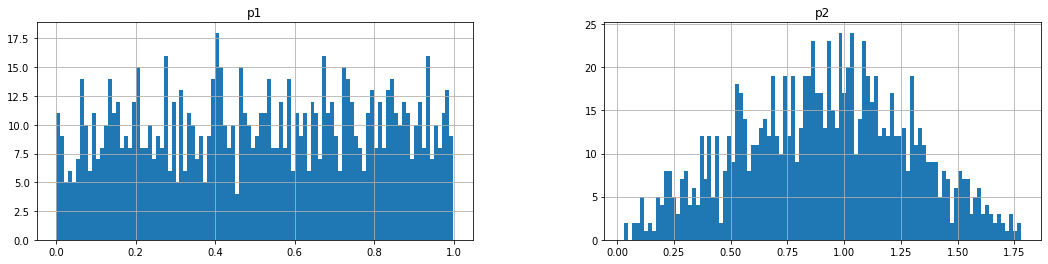

In [237]:
#hist

price.hist(figsize=(18,4),bins=100)

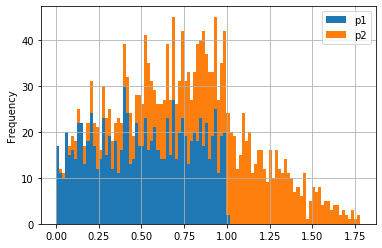

In [238]:
price.plot.hist(bins=100,stacked=True)

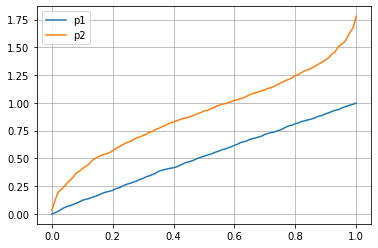

In [239]:
price.quantile([i*0.01 for i in range(101)]).plot()

0.7762282637751755


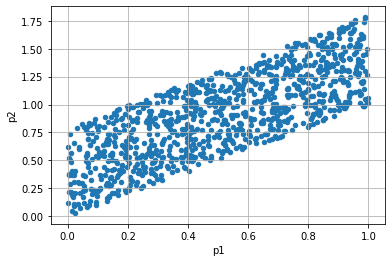

In [240]:
print(df['p1'].corr(df['p2']))

price.plot.scatter(x="p1",y="p2")

# 实践1：用户行为数据分析

### 注意：数据中的事件命名为真实产品中使用，id已脱敏，主要用于演示分析方法，结论不具有参考意义

In [257]:
#样本数据产生于2021.6.24 - 2021.6.30

df = pd.read_csv("sample.csv")
print(len(df))
df.head()

80000


,Unnamed: 0,device_brand,event_name,city,cli_timestamp,id
0,771346,OPPO,PetMall.PayPopup.CK,临沂市,1624889848300,ccc262a4a59ce6f900c4ea079d7892a4ia
1,2812995,OPPO,PetPage.Return.CK,天津市,1624600328483,9f3625d1f5f3037204003c4e6ecff337od
2,2645329,vivo,Pet.Feed.Toast.IM,玉林市,1625010651708,d15a46cc4136c3d1597c8ecc86df5c
3,2590875,Xiaomi,Diary.Add.Content.Save.CK,南充市,1624524615512,e4f0ea800c1f3c21886ac8c692e2a080od
4,3785882,Xiaomi,Home.Photo.CK,郑州市,1624598270873,a4e4a6dae0f124df5801966f6fc311a4od


#### 初步的数据处理和清洗

In [259]:
df['dt']=pd.to_datetime(df['cli_timestamp'],unit="ms")+pd.Timedelta(8, unit='H')

df.index = df['dt']

df = df.sort_index()
df = df["20210624":"20210630"]
df = df.drop("Unnamed: 0",axis=1)
df

,device_brand,event_name,city,cli_timestamp,id,dt
dt,,,,,,
2021-06-24 00:00:01.624,vivo,Home.Challenge.CK,湘潭市,1624464001624,0249552003d2302ac001f7af7c54e103od,2021-06-24 00:00:01.624
2021-06-24 00:00:23.257,HUAWEI,Home.Pet.CK,日照市,1624464023257,442aedc52fc9c7ae6fcd590d588606d7od,2021-06-24 00:00:23.257
2021-06-24 00:00:25.200,vivo,OpenScreen.ADC.REQ,梧州市,1624464025200,3642179fd1f28f3762858a6918d2c86c,2021-06-24 00:00:25.200
2021-06-24 00:00:30.480,HUAWEI,Gold.Slide,长沙市,1624464030480,2f2ccce2cfd8dc696a9cf3ca70fcf087,2021-06-24 00:00:30.480
2021-06-24 00:00:32.117,HONOR,Pet.PettingCat.Return.CK,百色市,1624464032117,cdee88357199f37c3832196691098168od,2021-06-24 00:00:32.117
...,...,...,...,...,...,...
2021-06-30 23:58:31.974,xiaomi,Home.People.IM,衡阳市,1625068711974,ad83f1f816cce248566ca2a60de3476,2021-06-30 23:58:31.974
2021-06-30 23:58:38.550,vivo,Home.Goods.CK,亳州市,1625068718550,fc9af3ee45769283f9757015643f374f,2021-06-30 23:58:38.550
2021-06-30 23:59:06.747,samsung,Home.People.Get.IM,上海市,1625068746747,386892fd88c2a64990fda1049f33cd34ia,2021-06-30 23:59:06.747


In [269]:
users = df.groupby("id").count()
users

,device_brand,event_name,city,cli_timestamp,dt
id,,,,,
0004996667ea380a93c8e687cf984188od,1,1,1,1,1
00063042cc6ff642f6a01781e1c2fd8aod,2,2,2,2,2
000fa88a3477c442d8360ec91dd8aacdod,3,3,3,3,3
00106c8d6cad2f6ddda206895dd25d88od,2,2,2,2,2
00148f97f6c409faee2decffd7e14ecaod,1,1,1,1,1
...,...,...,...,...,...
fff9a2324c8ca923678c0108f6aefdf,1,1,1,1,1
fff9e33c0a1711008f7a4e1043f1cdfcod,1,1,1,1,1
fffc31d83ccfa49d67455ff0a122225dod,1,1,1,1,1


#### 提出假设：只产生了一个事件的用户，启动以后就退出了

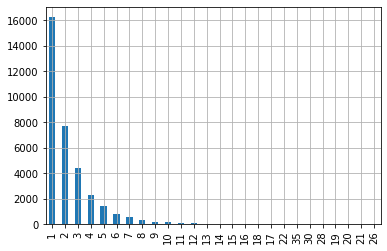

In [288]:
users['dt'].value_counts().plot(kind="bar")

#### 开始验证假设是否正确

In [272]:
one_ev_user = users[users['dt']==1]
one_ev_user.head()

,device_brand,event_name,city,cli_timestamp,dt
id,,,,,
0004996667ea380a93c8e687cf984188od,1,1,1,1,1
00148f97f6c409faee2decffd7e14ecaod,1,1,1,1,1
001853a2e5fc167e263dfc49f3c05e5cod,1,1,1,1,1
002010419aa705876949ac61eae42ff1od,1,1,1,1,1
0021180e598576a2ce55cec2a760ffa5od,1,1,1,1,1


In [292]:
one_ev = df[df['id'].isin(one_ev_user.index)]
one_ev

,device_brand,event_name,city,cli_timestamp,id,dt
dt,,,,,,
2021-06-24 00:00:01.624,vivo,Home.Challenge.CK,湘潭市,1624464001624,0249552003d2302ac001f7af7c54e103od,2021-06-24 00:00:01.624
2021-06-24 00:00:23.257,HUAWEI,Home.Pet.CK,日照市,1624464023257,442aedc52fc9c7ae6fcd590d588606d7od,2021-06-24 00:00:23.257
2021-06-24 00:00:25.200,vivo,OpenScreen.ADC.REQ,梧州市,1624464025200,3642179fd1f28f3762858a6918d2c86c,2021-06-24 00:00:25.200
2021-06-24 00:00:40.306,Redmi,Movie.Chat.Send.CK,长春市,1624464040306,5930446e9f9729d0e43c50ffcf47e09fod,2021-06-24 00:00:40.306
2021-06-24 00:00:45.888,Redmi,Anniversary.Edit.Save.CK,太原市,1624464045888,e5fcc8e023530ef4d2c3c9a5f52c5a5cod,2021-06-24 00:00:45.888
...,...,...,...,...,...,...
2021-06-30 23:57:30.675,asus,History.Item.IM,未知,1625068650675,333c84804fcc537f38664f1ccfac21,2021-06-30 23:57:30.675
2021-06-30 23:57:43.763,Lenovo,Challenge.Result.Scroll,大连市,1625068663763,201ec597c7c77705673cce291621a3a2ia,2021-06-30 23:57:43.763
2021-06-30 23:57:52.814,realme,Closer.Customize_Lanch,北海市,1625068672814,9a151216d41c643d739dda5c14e598c5ia,2021-06-30 23:57:52.814


In [294]:
one_ev.groupby("event_name").count().sort_values(by="id").tail(20)

,device_brand,city,cli_timestamp,id,dt
event_name,,,,,
Home.Pet.Feed.CK,199,199,199,199,199
History.Item.IM,205,205,205,205,205
Home.Slide,208,208,208,208,208
Diary.Slide,239,239,239,239,239
Pet.Feed.Toast.IM,243,243,243,243,243
Home.People.Get.IM,246,246,246,246,246
Home.People.IM,284,284,284,284,284
Challenge.Answer.Select.CK,291,291,291,291,291
OpenScreen.ADC.REQ,295,295,295,295,295


#### 假设检验失败，可能的结论：

1. 数据本身有问题
2. 由于使用客户端时间，所以会存在启动在前一天发生

#### 提出假设：根据用户属性，用户在周末更活跃

In [299]:
df['dayofweek'] = df['dt'].dt.dayofweek
df.head()

,device_brand,event_name,city,cli_timestamp,id,dt,dayofweek
dt,,,,,,,
2021-06-24 00:00:01.624,vivo,Home.Challenge.CK,湘潭市,1624464001624,0249552003d2302ac001f7af7c54e103od,2021-06-24 00:00:01.624,3
2021-06-24 00:00:23.257,HUAWEI,Home.Pet.CK,日照市,1624464023257,442aedc52fc9c7ae6fcd590d588606d7od,2021-06-24 00:00:23.257,3
2021-06-24 00:00:25.200,vivo,OpenScreen.ADC.REQ,梧州市,1624464025200,3642179fd1f28f3762858a6918d2c86c,2021-06-24 00:00:25.200,3
2021-06-24 00:00:30.480,HUAWEI,Gold.Slide,长沙市,1624464030480,2f2ccce2cfd8dc696a9cf3ca70fcf087,2021-06-24 00:00:30.480,3
2021-06-24 00:00:32.117,HONOR,Pet.PettingCat.Return.CK,百色市,1624464032117,cdee88357199f37c3832196691098168od,2021-06-24 00:00:32.117,3


In [302]:
lauch_df = df[df['event_name']=="Closer.Customize_Lanch"]
lauch_df.head()

,device_brand,event_name,city,cli_timestamp,id,dt,dayofweek
dt,,,,,,,
2021-06-24 00:16:06.163,OPPO,Closer.Customize_Lanch,芜湖市,1624464966163,e66dce4cff8d9a457c69dca770714e5c,2021-06-24 00:16:06.163,3
2021-06-24 00:17:24.060,vivo,Closer.Customize_Lanch,温州市,1624465044060,d527d6c37a03f4cecdee64d7e93a1a28od,2021-06-24 00:17:24.060,3
2021-06-24 00:25:48.528,Xiaomi,Closer.Customize_Lanch,郑州市,1624465548528,46c33e4f2082fcccd6879f37fc8edc32od,2021-06-24 00:25:48.528,3
2021-06-24 00:39:08.706,vivo,Closer.Customize_Lanch,六安市,1624466348706,dc4e456fefcad5feec18accf1c98127,2021-06-24 00:39:08.706,3
2021-06-24 01:21:07.757,HONOR,Closer.Customize_Lanch,武汉市,1624468867757,365fffe02f3e265c1281c7fca1cd0135od,2021-06-24 01:21:07.757,3


In [308]:
print(len(lauch_df))
lauch_users = lauch_df.drop_duplicates("id")
print(len(lauch_users))

1262
1232


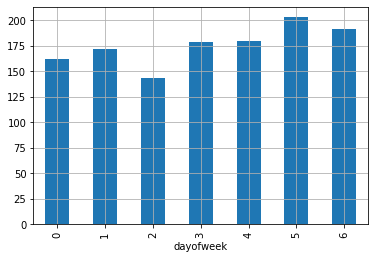

In [309]:
lauch_users.groupby("dayofweek").count()['dt'].plot(kind="bar")

#### 假设基本符合，周末启动的用户最多，周三最不活跃

# 答疑和后续

* 数据分析学习群？
* 结对实践？